# ADA - Final project
This notebook aims at giving technical explanations necessary to understand how the results given in the final report were found.

First off, the following commands allow you to retrieve the data necessary to run this notebook locally from the cluster used for this class.
1. Upload the files script.sh and script.py using the following command:  
```bash 
scp -r -p /path/to/script.py GASPAR@iccluster028.iccluster.epfl.ch:/home/GASPAR/script.py  
scp -r -p /path/to/script.sh GASPAR@iccluster028.iccluster.epfl.ch:/home/GASPAR/script.sh
```
2. Connect to the cluster using a second terminal and run the scripts:  
```bash 
ssh GASPAR@iccluster028.iccluster.epfl.ch  
sh script.sh script.py  
```
3. Store the output in the home folder:  
```bash 
hadoop fs -get /user/GASPAR/politics_2016_* file:///home/GASPAR
```
4. Download the data locally:  
```bash 
scp -r GASPAR@iccluster028.iccluster.epfl.ch:/home/GASPAR/politics_2016_* /local/path/to/folder
```

The dataset consists of several different features listed below:
* **author**: The username of the author of the comment.
* **author_flair_text**: Users can pick so-called *flairs* which are basically tags intended to briefly summarize the user.  They're different for each subreddit, and users can only pick one per subreddit.
* **body**: The content of the comment.
* **created_utc**: The date at which the comment was originally posted.
* **gilded**: Denotes if the comment received a gold. A gold is a form of gratification users can give one another. They're not common because gilding someone costs money.
* **id**: A unique ID that defines the comment.
* **link_id**: A unique ID that determines the post in which the comment was posted to.
* **parent_id**: A unique ID that determines to what the comment is responding to. If it starts with *t1*, the comment is a response to another comment. If it starts with *t3*, the comment is responding directly to the original post.
* **score**: The number of upvotes minus the number of downvotes the comment received.


## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy

nlp = spacy.load('en')

%matplotlib inline

## Loading data

In [3]:
DATA_PATH = 'data/'

In [4]:
politics_06 = pd.read_parquet(DATA_PATH + 'politics_2016_06/')
politics_07 = pd.read_parquet(DATA_PATH + 'politics_2016_07/')
politics_08 = pd.read_parquet(DATA_PATH + 'politics_2016_08/')
politics_09 = pd.read_parquet(DATA_PATH + 'politics_2016_09/')
politics_10 = pd.read_parquet(DATA_PATH + 'politics_2016_10/')
politics_11 = pd.read_parquet(DATA_PATH + 'politics_2016_11/')

## Cleaning data

Features are converted into appropriate format.

In [5]:
# created_utc is converted to the datetime format
politics_06['created_utc'] = pd.to_datetime(politics_06['created_utc'], unit='s')
politics_07['created_utc'] = pd.to_datetime(politics_07['created_utc'], unit='s')
politics_08['created_utc'] = pd.to_datetime(politics_08['created_utc'], unit='s')
politics_09['created_utc'] = pd.to_datetime(politics_09['created_utc'], unit='s')
politics_10['created_utc'] = pd.to_datetime(politics_10['created_utc'], unit='s')
politics_11['created_utc'] = pd.to_datetime(politics_11['created_utc'], unit='s')

# author_flair_text is converted to a category
politics_06['author_flair_text'] = politics_06['author_flair_text'].astype('category')
politics_07['author_flair_text'] = politics_07['author_flair_text'].astype('category')
politics_08['author_flair_text'] = politics_08['author_flair_text'].astype('category')
politics_09['author_flair_text'] = politics_09['author_flair_text'].astype('category')
politics_10['author_flair_text'] = politics_10['author_flair_text'].astype('category')
politics_11['author_flair_text'] = politics_11['author_flair_text'].astype('category')


Dataframes for each month are then concatenated into one massive Dataframe whose data types are just as expected.

In [6]:
politics = pd.concat([politics_06, politics_07, politics_08, politics_09, politics_10, politics_11]).reset_index()
politics['author_flair_text'] = politics['author_flair_text'].astype('category') #necessary to do it again

In [7]:
politics.dtypes

index                         int64
author                       object
author_flair_text          category
body                         object
created_utc          datetime64[ns]
gilded                        int64
link_id                      object
parent_id                    object
score                         int64
dtype: object

In [8]:
politics.describe()

,index,gilded,score
count,1.086033e+07,1.086033e+07,1.086033e+07
mean,9.539365e+05,3.835981e-04,6.766324e+00
std,6.041415e+05,2.441999e-02,5.706394e+01
min,0.000000e+00,0.000000e+00,-8.620000e+02
25%,4.525130e+05,0.000000e+00,1.000000e+00
50%,9.050270e+05,0.000000e+00,1.000000e+00
75%,1.370547e+06,0.000000e+00,4.000000e+00
max,2.522909e+06,1.400000e+01,1.901100e+04


In [10]:
politics

,index,author,author_flair_text,body,created_utc,gilded,link_id,parent_id,score
0,0,wheresthecheese,NaN,I'm very glad I read that. The first well thou...,2016-06-01 00:00:00,0,t3_4lxbri,t3_4lxbri,3
1,1,ifCreepyImJoking,NaN,"Eh, once you start adding qualifiers instead o...",2016-06-01 00:00:03,0,t3_4lwef1,t1_d3r17zv,0
2,2,Sam_Munhi,NaN,How so? Clinton and Trump are the two most dis...,2016-06-01 00:00:12,0,t3_4lxbzg,t1_d3r0tm6,4
3,3,VowOfKsitigarbha,NaN,Is he attacking the wrong target?,2016-06-01 00:00:12,0,t3_4lycd3,t3_4lycd3,25
4,4,iAMADisposableAcc,NaN,"We can agree on that, although I guess we have...",2016-06-01 00:00:15,0,t3_4lw22m,t1_d3r2rv0,2
5,5,1blah1,NaN,looks like smart sales people.,2016-06-01 00:00:18,0,t3_4lybh7,t3_4lybh7,-8
6,6,IntelligentFlame,NaN,Careful with the CTR stuff or you'll be banned...,2016-06-01 00:00:19,0,t3_4lxbzg,t1_d3r30iu,3
7,7,backtorealitywepour,NaN,That's not even remotely true... There literal...,2016-06-01 00:00:20,0,t3_4lxbzg,t1_d3r30fz,0
8,8,Grnmntman,NaN,Why are we still considering her a viable cand...,2016-06-01 00:00:23,0,t3_4lyc67,t3_4lyc67,3
9,9,edwardybarra,NaN,- Costanza,2016-06-01 00:00:24,0,t3_4lxbzg,t1_d3r126k,3


## Processing data

A basic example displaying how spaCy works.

In [20]:
sample = politics.sample(5)

for index, row in sample.iterrows():
    print(row.body)
    doc = nlp(row.body)
    for ent in doc.ents:
        print(ent.text, ent.label_)

Let's apply some logic then.

&gt; The country is going to hell.

Is it though?  By what metric?

&gt; or, we can elect an outsider 

That doesn't mean we have to elect this "outsider".  Charles Manson, Barney the Dinosaur, and my cousin are all outsiders and I wouldn't vote for any of them.  They're unqualified.

And an outsider he is not.  He has been cozy with politicians forever.  He is the lobbyist that everyone rallies against as the source of corruption.

&gt; who says he will change things.

I can say a lot of things.  I can tell you that I'll fix a 747.  Doesn't mean I can do it.  You know why?  Because I have zero qualifications to do so.

Just because you want to see things change, doesn't mean we should just throw half-baked ideas at the wall and see what sticks.


 DATE
Charles Manson PERSON
Barney PERSON
747 CARDINAL
zero CARDINAL
Question is, who will lead that fight and will Canada join them?
Canada GPE
Im sure you get your information from a source that was predicting 

## Visualizing data

To get a feel for the dataset, a histogram with the number of comments for each day is plotted.

In [85]:
# computation of the number of days the dataset spans
days = (politics.iloc[-1].created_utc - politics.iloc[0].created_utc).days + 1

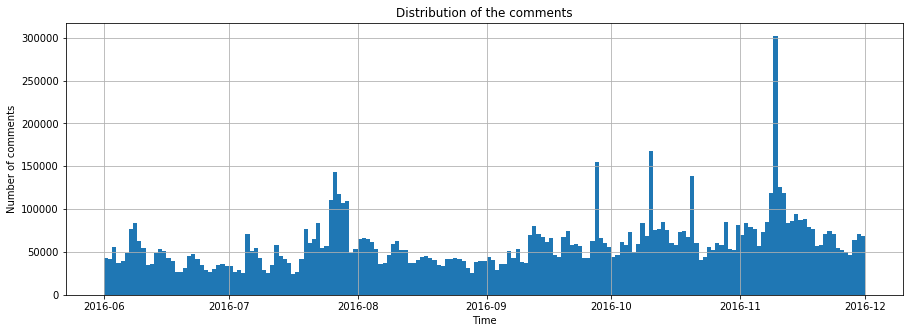

In [92]:
plt.figure(figsize=(15,5))
plt.grid()
plt.hist(politics['created_utc'], bins=days)
plt.ylabel('Number of comments')
plt.xlabel('Time')
plt.title('Distribution of the comments')
plt.show()